# HRV EDA

In [1]:
import importlib
import project_utils.deciles as deciles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
from general_utils.OverallDetailComparisonPlot import OverallDetailComparisonPlot
import os
import pandas as pd

utils.default_plot_format()
utils.pd_display_settings(3)

Predefine where data is and where the plotly images will be saved

In [2]:
import matplotlib as mpl
import plotly.express as px
palette = px.colors.qualitative.Plotly
palette, _ = px.colors.convert_colors_to_same_type(palette, colortype='tuple')
palette = [mpl.colors.rgb2hex(color) for color in palette]
px.defaults.color_discrete_sequence = palette
sns.set_palette(sns.color_palette(palette))
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
sns.set_context("notebook", rc={"axes.labelweight": "bold"})
mpl.rcParams['scatter.marker'] = 'o'
mpl.rcParams['lines.markersize'] = 20

In [3]:
#data_path = r'processed_data\5min_nabian_2025_03_03.pkl'
data_path = r"processed_data\raw_metrics\processed_10min_Nabian.pkl"
#data_path = "processed_data/manual_10min_2025_03_03.pkl"
#data_path = r'processed_data\raw_metrics\optimized_20min_Nabian.pkl'
title_addon = " (10 min segments)"

In [4]:
pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]
data.tail()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,ULF Peak Power,VLF Power,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
3250,22212,22812,30.89,24.63,3.13,79.80,2.35e-08,0,1.61e-05,4.24e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
3251,21611,22211,40.47,34.10,13.03,77.50,1.07e-08,0,9.96e-06,2.39e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
3252,21010,21610,38.71,41.98,27.34,75.71,1.28e-09,0.00167,1.49e-06,3.11e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
3253,34218,34818,88.51,31.71,12.61,79.37,1.33e-08,0.00167,1.59e-05,3.19e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
3254,76304,76903,173.75,220.18,22.22,74.74,3.17e-09,0.00167,3.57e-06,1.2e-06,...,10.23,0.43,1,0,0,True,0,0,1,DPN


In [5]:
", ".join(indicator_columns)

'SDRR, RMSSD, pNN50 (%), Mean HR (bpm), VLF Power, VLF Peak Frequency, LF Power, LF Peak Frequency, HF Power, HF Peak Frequency, LF÷HF Ratio, S, SD1, SD2, SD1÷SD2, ApEn, SampEn, DFA α1, DFA α2, D2'

# Illustration of all data

In [23]:
# Normalize the data for each metric in indicator_columns
normalized_data = data.copy()
for metric in indicator_columns:
    values = normalized_data[metric]
    min_val, max_val = values.min(), values.max()
    if min_val != max_val:  # Avoid division by zero
        normalized_data[metric] = (values - min_val) / (max_val - min_val)
    else:
        normalized_data[metric] = 0  # Assign 0 if all values are the same

display(normalized_data[indicator_columns].describe())
normalized_melted = deciles.produce_median_melt(normalized_data, indicator_columns)

,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),VLF Power,VLF Peak Frequency,LF Power,LF Peak Frequency,HF Power,HF Peak Frequency,LF÷HF Ratio,S,SD1,SD2,SD1÷SD2,ApEn,SampEn,DFA α1,DFA α2,D2
count,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,3210,2657
mean,0.26,0.20,0.14,0.37,0.0464,0.73,0.11,0.64,0.27,0.73,0.0724,0.0981,0.20,0.29,0.35,0.56,0.34,0.47,0.40,0.79
std,0.20,0.19,0.19,0.16,0.09,0.19,0.12,0.30,0.16,0.23,0.0802,0.16,0.19,0.20,0.17,0.21,0.17,0.16,0.15,0.0195
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,0.12,0.0539,0.0113,0.26,0.00489,0.59,0.0421,0.41,0.15,0.56,0.0307,0.00946,0.0539,0.14,0.21,0.39,0.21,0.34,0.28,0.79
50%,0.21,0.13,0.0606,0.36,0.0142,0.77,0.069,0.72,0.24,0.78,0.0466,0.0346,0.13,0.24,0.36,0.58,0.33,0.43,0.38,0.79
75%,0.35,0.27,0.18,0.48,0.0474,0.91,0.12,0.91,0.37,0.92,0.0808,0.11,0.27,0.39,0.47,0.73,0.46,0.58,0.50,0.80
max,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


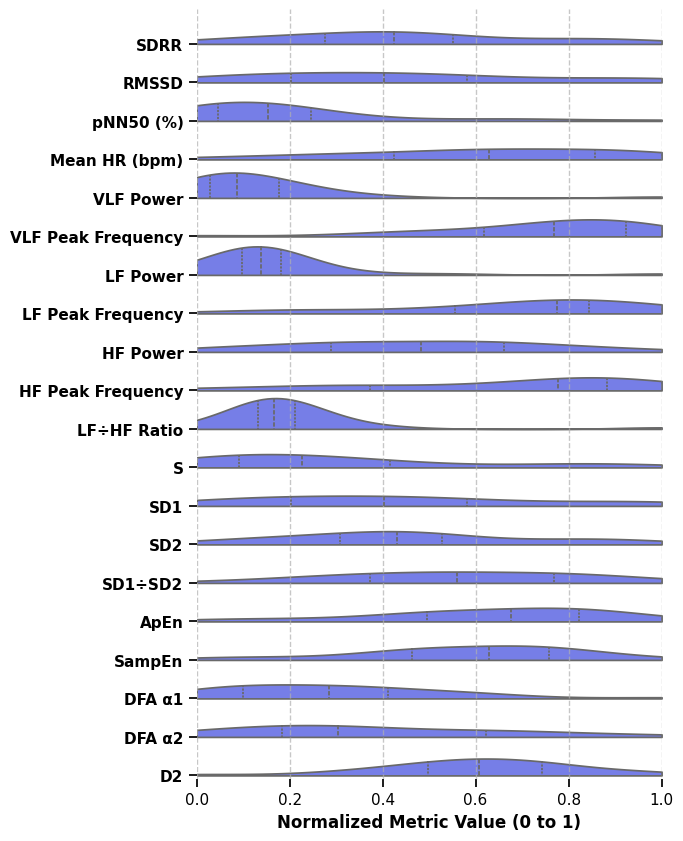

In [ ]:
# Normalize the data for each metric
normalized_data = deciles.produce_median_melt(data, indicator_columns)

# Normalize values for each metric
for metric in normalized_data['metric'].unique():
    mask = normalized_data['metric'] == metric
    values = normalized_data.loc[mask, 'value']
    normalized_data.loc[mask, 'value'] = (values - values.min()) / (values.max() - values.min())

# Plot the vertical violin plot
plt.figure(figsize=(6, 10))
ax = sns.violinplot(
    data=normalized_data, 
    y='metric', 
    x='value', 
    split=True, 
    inner='quartile', 
    cut=0
)


plt.title(None)
plt.xlabel('Normalized Metric Value (0 to 1)')
plt.ylabel(None)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust y-ticks and remove unnecessary spines
ax.set_yticks([tick + 0.4 for tick in ax.get_yticks()])


for label in ax.get_yticklabels():
    label.set_fontweight('bold')

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)


plt.show()

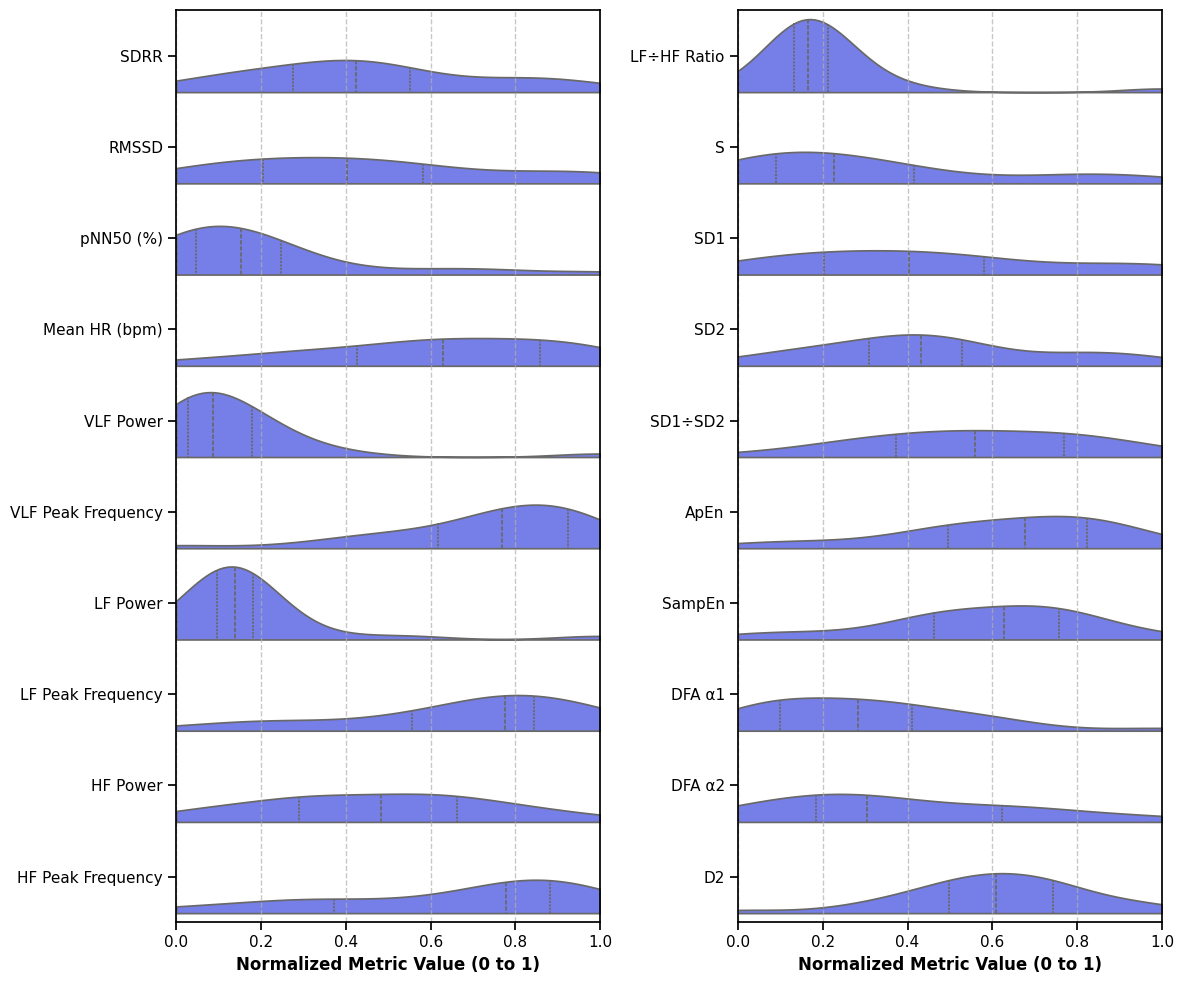

In [ ]:
def plot_violin(data, metrics, ax, title):
    sns.violinplot(
        data=data[data['metric'].isin(metrics)],
        y='metric',
        x='value',
        split=True,
        inner='quartile',
        cut=0,
        ax=ax
    )
    plt.xlim([0,1])
    ax.set_title(None)
    ax.set_xlabel('Normalized Metric Value (0 to 1)')
    ax.set_ylabel(None)
    ax.grid(axis='x', linestyle='--', alpha=0.7)


    ax.set_yticks([tick + 0.4 for tick in ax.get_yticks()])


    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Split metrics into two groups
mid_index = len(normalized_data['metric'].unique()) // 2
left_metrics = normalized_data['metric'].unique()[:mid_index]
right_metrics = normalized_data['metric'].unique()[mid_index:]

# Create a figure with two horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 10), sharex=True)

# Plot the left metrics
plot_violin(normalized_data, left_metrics, axes[0], 'Left Metrics')

# Plot the right metrics
plot_violin(normalized_data, right_metrics, axes[1], 'Right Metrics')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Median only comparison:
We first derive median of each metric and put them into a single df

In [36]:
median_melted = deciles.produce_median_melt(data, indicator_columns)

median_melted.tail(3)

,id,DPN,metric,value
517,38,True,D2,-2.16
518,39,True,D2,-3.26
519,40,True,D2,-2.75


In [37]:
from general_utils import CorrectedMultivariableTest as CMT

importlib.reload(CMT)


test = CMT.CorrectedMultivariableTest(
    data=median_melted, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=False,
    cat_val_2=True
)


result = test.perform_ManWhitney_U_tests()
result.sort_values('p_value', inplace=True)
display(result)
result.reset_index(inplace=True, drop=False)

,U_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
HF Power,80,0.00709,True,20,0.05,True
LF Power,76,0.0207,True,19,0.0475,True
SDRR,74,0.0322,True,17,0.0425,True
SD2,74,0.0322,True,18,0.045,True
S,73,0.0395,True,16,0.04,True
SD1,71,0.0577,False,15,0.0375,False
RMSSD,71,0.0577,False,14,0.035,False
Mean HR (bpm),18,0.0689,False,13,0.0325,False
pNN50 (%),69,0.0815,False,12,0.03,False


In [38]:
result[result['p_value'] < 0.1].index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

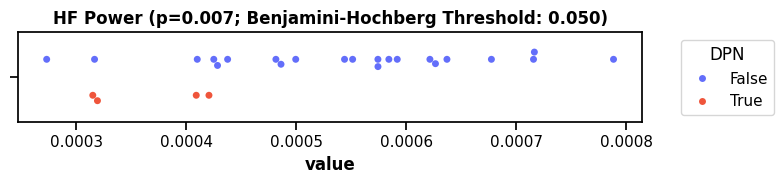

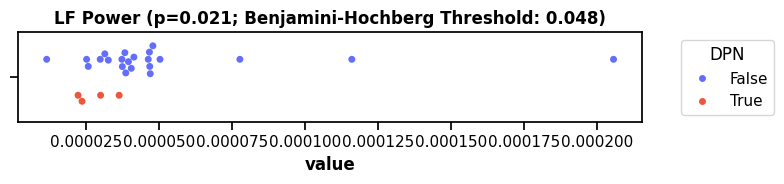

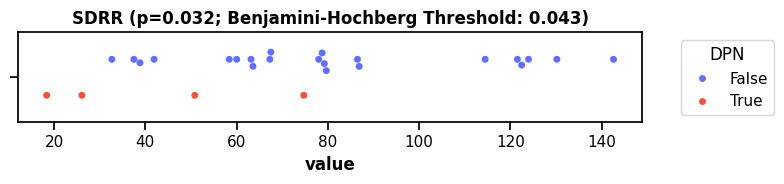

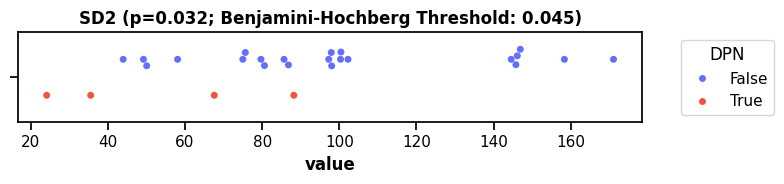

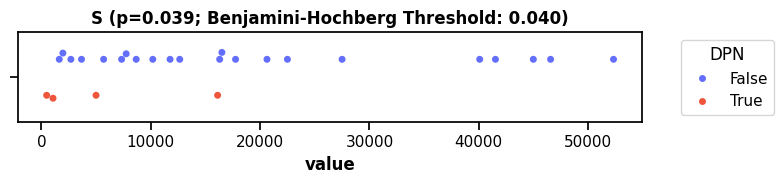

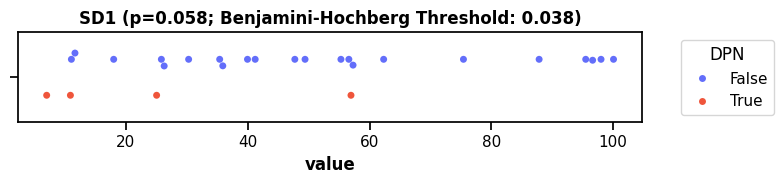

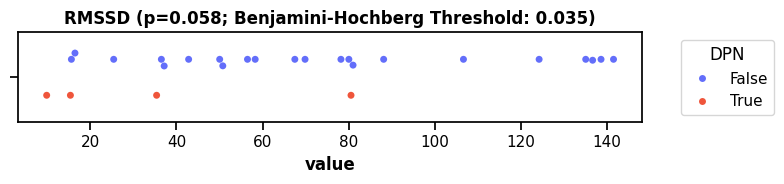

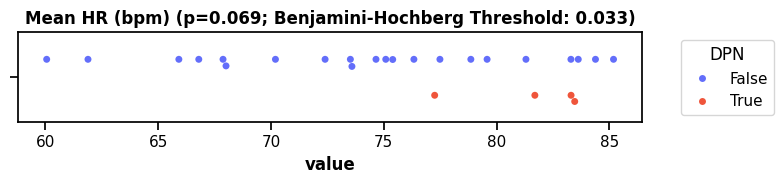

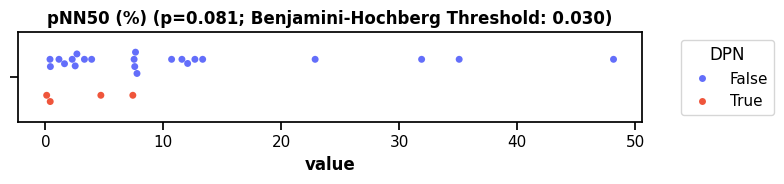

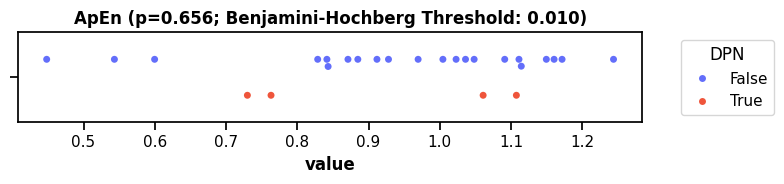

In [39]:
for i, row in result.iterrows():
    if row['p_value'] < 0.1 or (row['metric'] == 'ApEn'):
        title = f"{row['metric']} (p={row['p_value']:.3f}; Benjamini-Hochberg Threshold: {row['BH_threshold']:.3f})"
        plt.figure(figsize=(8, 2))
        plt.title(title)
        sns.swarmplot(
            data=median_melted[median_melted['metric'] == row['metric']],  
            hue = 'DPN',
            x='value',
            dodge=True
        )
        # Move legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DPN')
        plt.tight_layout()

# MEDIAN ABSOLUTE DEVIATION

In [40]:
def normalize_melt(df):
    df = df[df.metric!='D2']
    for metric in df["metric"].unique():
        mask = df["metric"]==metric
        values = df[df["metric"]==metric]["value"]
        df.loc[mask, "value"] = values / values.max()

    return df


def plot_normalized(df, title=None, figsize=(8, 15)):
    plt.figure(figsize=figsize)
    sns.swarmplot(data=df, y='metric', x='value', hue = 'DPN', size=4)
    plt.title(title)
    plt.show()

In [41]:
# Mad values
import scipy.stats as stats
import numpy as np


mad=data.groupby(["id", 'DPN'])[indicator_columns].agg(stats.median_abs_deviation)
mad_melt = mad.reset_index().melt(id_vars=["id", 'DPN'], value_vars=indicator_columns, var_name='metric', value_name = 'value')
display(mad_melt)

,id,DPN,metric,value
0,0,False,SDRR,20.41
1,3,False,SDRR,25.05
2,4,False,SDRR,31.20
3,5,False,SDRR,16.02
4,7,False,SDRR,30.90
...,...,...,...,...
515,35,False,D2,NaN
516,37,True,D2,NaN
517,38,True,D2,NaN
518,39,True,D2,NaN


In [42]:
test = CMT.CorrectedMultivariableTest(
    data=mad_melt, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=False,
    cat_val_2=True
)


result = test.perform_ManWhitney_U_tests()
result.sort_values('p_value', inplace=True)
display(result)
result.reset_index(inplace=True, drop=False)

,U_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SampEn,14,0.0322,True,19,0.0475,True
DFA α1,17,0.0577,False,18,0.045,False
ApEn,18,0.0689,False,17,0.0425,False
LF Peak Frequency,19,0.0815,False,16,0.04,False
VLF Peak Frequency,20,0.0959,False,14,0.035,False
S,68,0.0959,False,15,0.0375,False
DFA α2,23,0.15,False,13,0.0325,False
SD2,65,0.15,False,12,0.03,False
SDRR,64,0.17,False,11,0.0275,False


In [43]:
result[result.p_value<0.1].index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [44]:
#to_plot = [x for x in time_metrics if x != "S"]
#figsize = (8, 5)
#plot_normalized(normalize_melt(mad_melt[mad_melt["metric"].isin(to_plot )]), "Normalized Median Absolute Deviation Distribution", figsize)
#plot_normalized(normalize_melt(median_melted[median_melted["metric"].isin(to_plot )]), "Normalized Median Distribution", figsize)

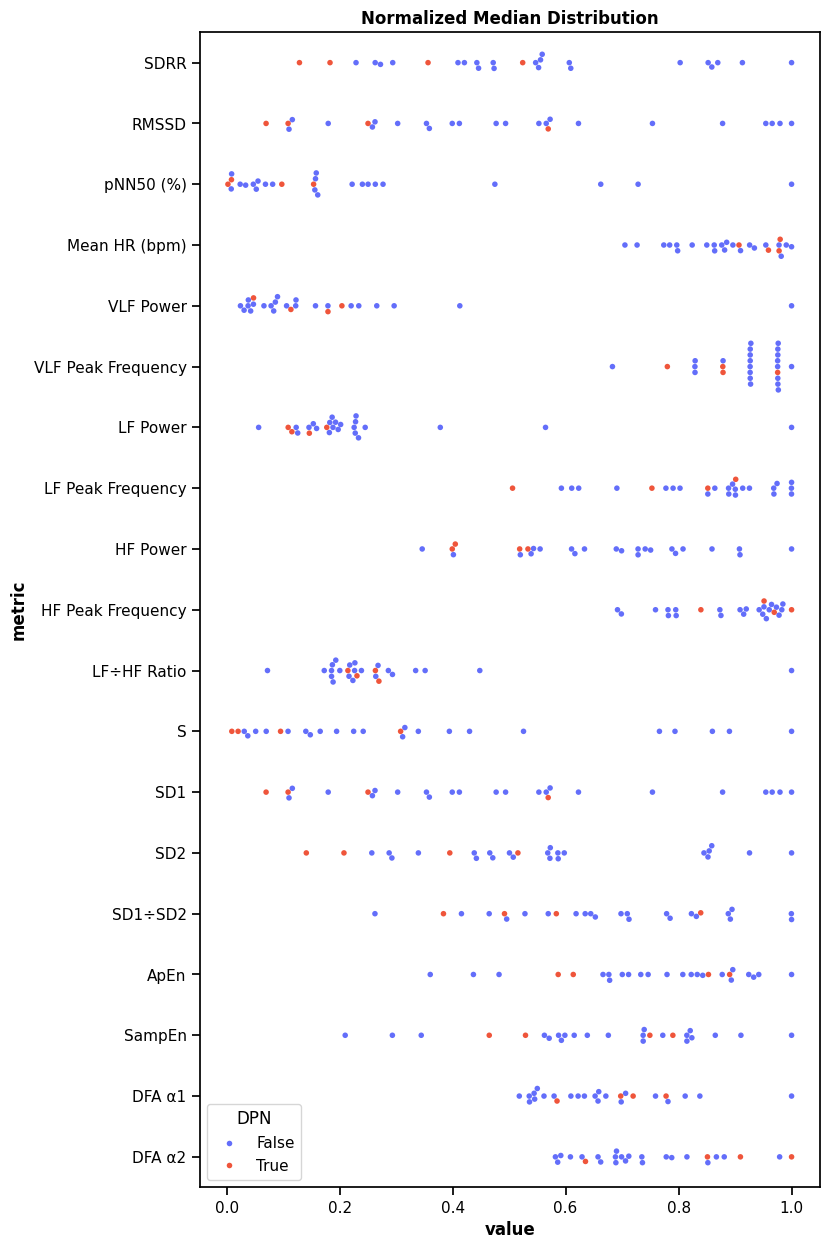

In [45]:
plot_normalized(normalize_melt(median_melted), "Normalized Median Distribution")

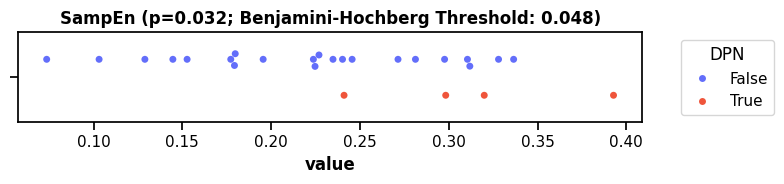

In [46]:
for i, row in result.iterrows():
    if  row["metric"]=="SampEn":
        title = f"{row['metric']} (p={row['p_value']:.3f}; Benjamini-Hochberg Threshold: {row['BH_threshold']:.3f})"
        plt.figure(figsize=(8, 2))
        plt.title(title)
        sns.swarmplot(
            data=mad_melt[mad_melt['metric'] == row['metric']],  
            hue = 'DPN',
            x='value',
            dodge=True
        )
        # Move legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DPN')
        plt.tight_layout()

# Permutations test

In [47]:
stats.permutation_test

<function scipy.stats._resampling.permutation_test(data, statistic, *, permutation_type='independent', vectorized=None, n_resamples=9999, batch=None, alternative='two-sided', axis=0, random_state=None)>

## Permutation test

In [48]:
importlib.reload(CMT)
import numpy as np
from copy import deepcopy

test = CMT.CorrectedMultivariableTest(
    data=median_melted, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=True,
    cat_val_2=False
)

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

result = test.permutation_test(statistic, n_permutations=100000)

result.sort_values('p_value', inplace=True)
to_print = deepcopy(result)
to_print.drop(columns=["distribution"], inplace=True)
display(to_print)


,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
HF Power,-0.000178,0.0126,True,20,0.05,True
SD2,-45.85,0.0199,True,19,0.0475,True
SDRR,-38.18,0.0257,True,18,0.045,True
Mean HR (bpm),7.09,0.0503,False,17,0.0425,False
LF Power,-2.25e-05,0.0569,False,16,0.04,False
DFA α2,0.14,0.0674,False,15,0.0375,False
SD1,-27.65,0.0686,False,14,0.035,False
RMSSD,-39.11,0.0686,False,13,0.0325,False
S,-13458.63,0.0709,False,12,0.03,False


In [49]:
result[result.p_value<0.1].index

Index(['HF Power', 'SD2', 'SDRR', 'Mean HR (bpm)', 'LF Power', 'DFA α2', 'SD1',
       'RMSSD', 'S'],
      dtype='object', name='metric')

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
HF Power,-0.000178,0.0126,True,20,0.05,True


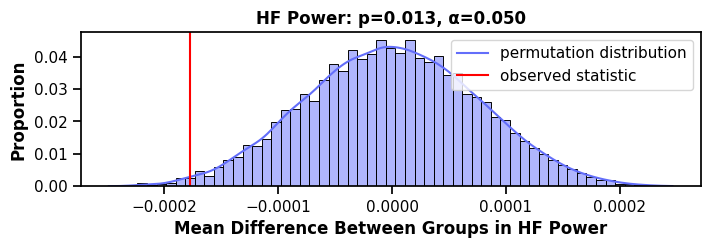

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SD2,-45.85,0.0199,True,19,0.0475,True


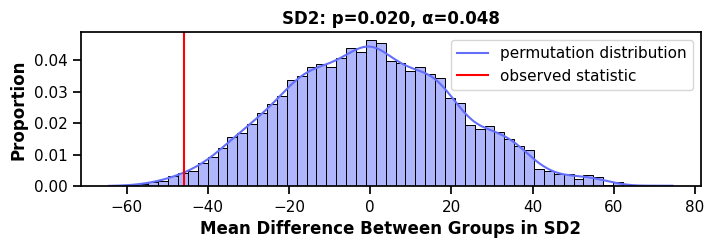

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SDRR,-38.18,0.0257,True,18,0.045,True


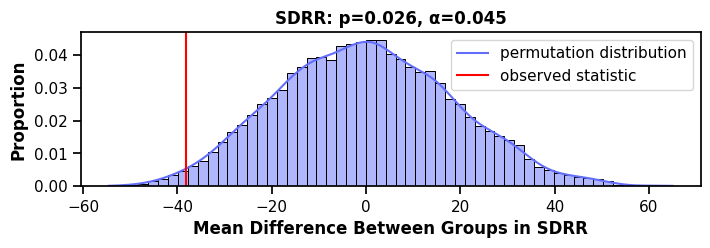

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
Mean HR (bpm),7.09,0.0503,False,17,0.0425,False


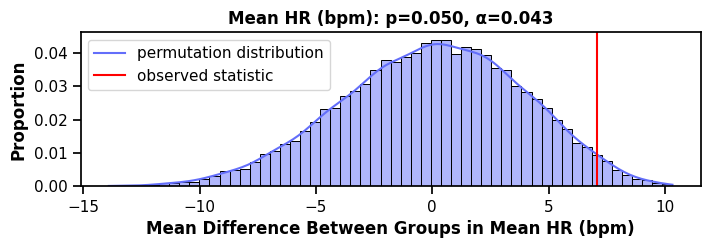

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
LF Power,-2.25e-05,0.0569,False,16,0.04,False


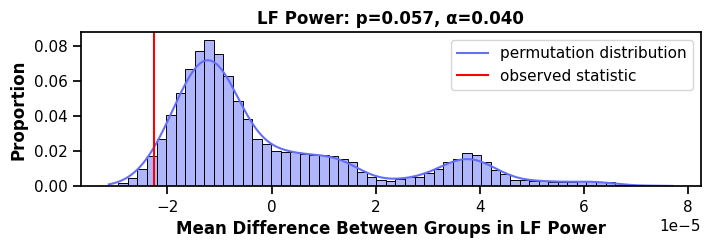

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
DFA α2,0.14,0.0674,False,15,0.0375,False


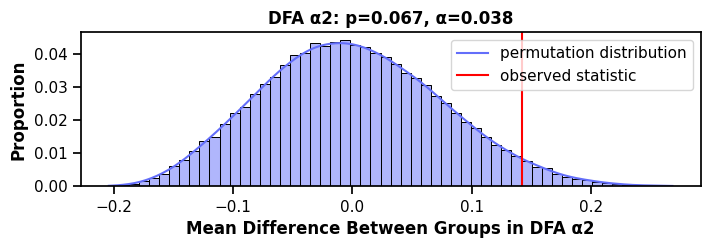

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SD1,-27.65,0.0686,False,14,0.035,False


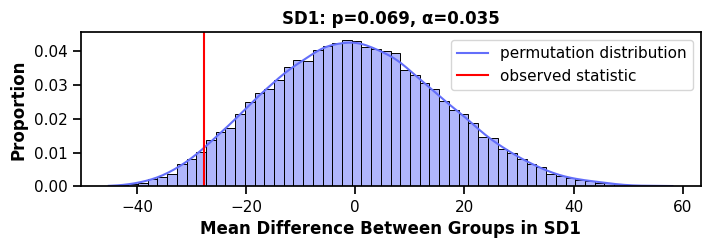

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
RMSSD,-39.11,0.0686,False,13,0.0325,False


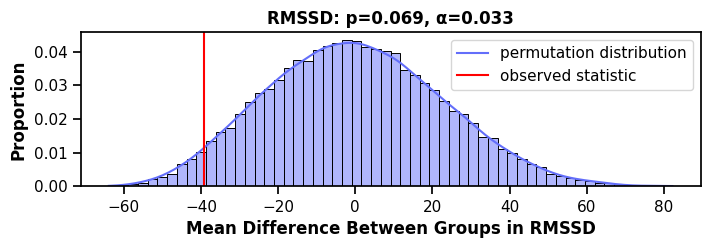

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
S,-13458.63,0.0709,False,12,0.03,False


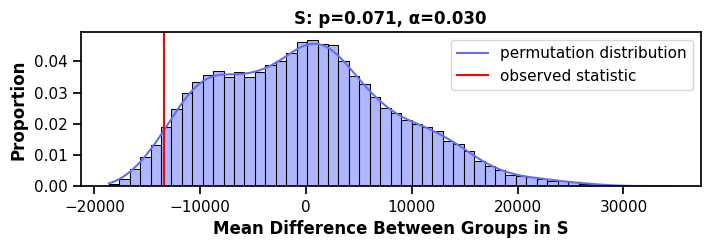

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
pNN50 (%),-8.07,0.12,False,11,0.0275,False


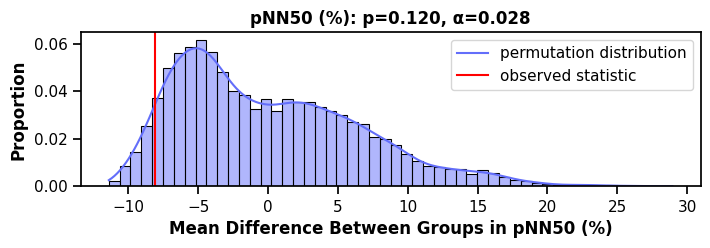

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
LF Peak Frequency,-0.0139,0.19,False,10,0.025,False


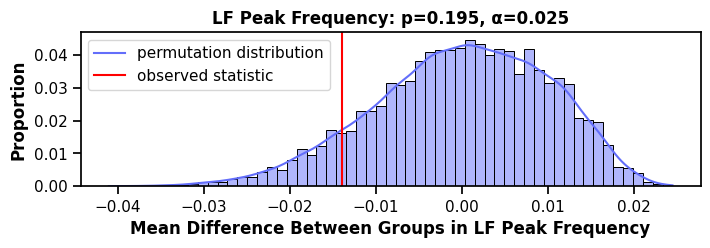

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
D2,-0.67,0.25,False,9,0.0225,False


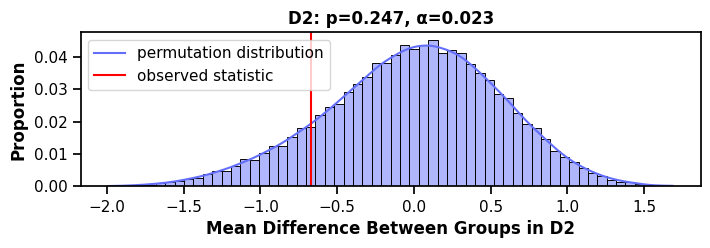

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SD1÷SD2,-0.0897,0.26,False,8,0.02,False


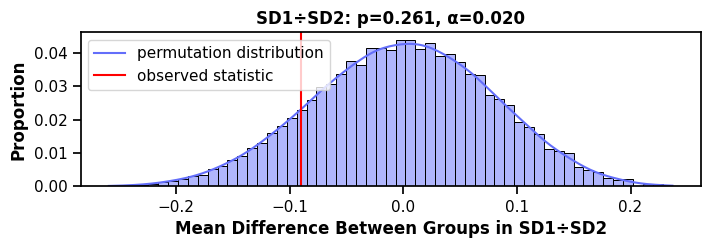

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
HF Peak Frequency,0.0211,0.29,False,7,0.0175,False


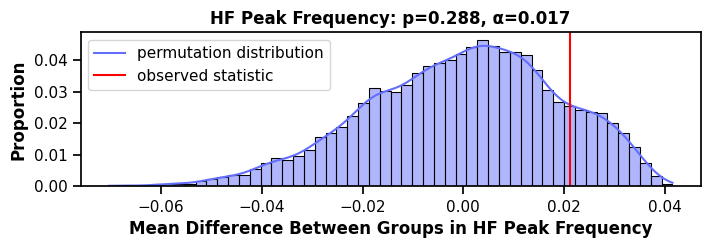

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
VLF Peak Frequency,-0.00148,0.31,False,6,0.015,False


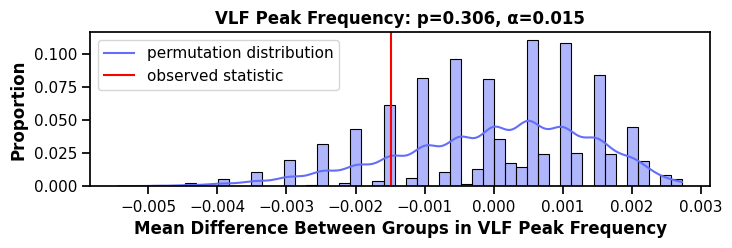

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
DFA α1,0.0518,0.53,False,5,0.0125,False


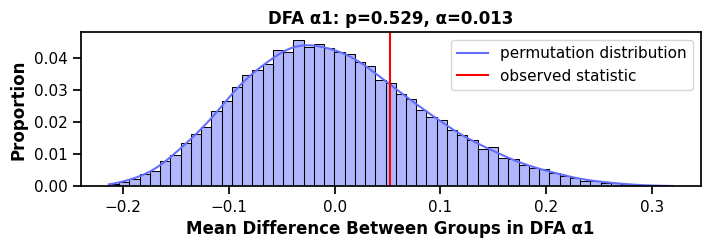

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
SampEn,-0.0494,0.71,False,4,0.01,False


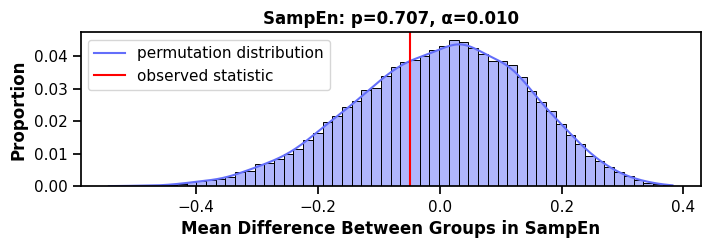

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
ApEn,-0.0312,0.75,False,3,0.0075,False


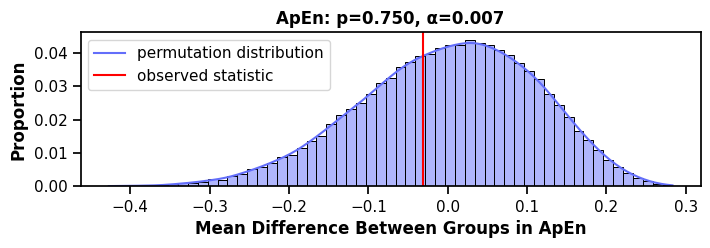

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
LF÷HF Ratio,-0.00943,0.97,False,2,0.005,False


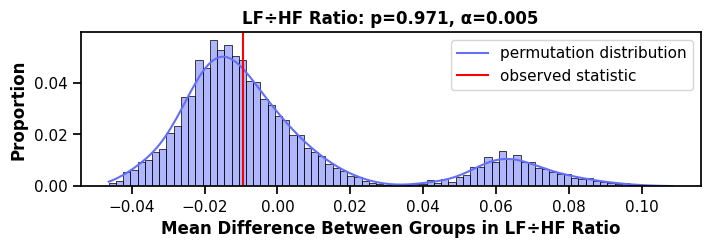

,perm_statistic,p_value,significant,rank,BH_threshold,BH_Significant
metric,,,,,,
VLF Power,-9.53e-07,0.97,False,1,0.0025,False


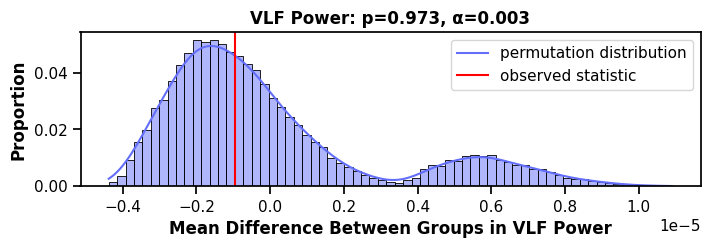

In [68]:
result.tail(3)
for metric in result.index:
    display(to_print[to_print.index == metric])
    plt.figure(figsize=(8, 2))
    sns.histplot(data=result.loc[metric, "distribution"], stat="proportion", kde=True)
    #title = f"permutation test dist. of {metric} 
    plt.title(f"{metric}: p={result.loc[metric, 'p_value']:.3f}, α={result.loc[metric, 'BH_threshold']:.3f}")
    plt.axvline(result.loc[metric, "perm_statistic"], color='red')
    plt.legend(["permutation distribution", "observed statistic"])
    plt.xlabel(f"Mean Difference Between Groups in {metric}")
    plt.show()

In [51]:
#plot_normalized(normalize_melt(median_melted), "Normalized Median Distribution")

## Odds ratio

In [52]:
median = data.groupby(['id', 'DPN'])[indicator_columns].median()
median = median.reset_index()
median.tail(2)

,id,DPN,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),VLF Power,VLF Peak Frequency,LF Power,LF Peak Frequency,...,LF÷HF Ratio,S,SD1,SD2,SD1÷SD2,ApEn,SampEn,DFA α1,DFA α2,D2
24,39,True,26.09,15.39,0.41,83.30,5.73e-06,0.03,2.24e-05,0.0684,...,0.0741,1059,10.88,35.53,0.37,0.76,0.72,1.00,1.04,-3.26
25,40,True,50.84,35.41,7.41,81.70,3.19e-06,0.03,3.01e-05,0.12,...,0.093,4993,25.04,67.59,0.43,1.06,1.03,0.97,0.97,-2.75


In [53]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### KDE derrival
Weight the KDE by number of units

In [54]:
def compute_kde_for_metric(data, metric, weight_data = False):
    # Separate the data based on the 'DPN' column
    control_data = data[data['DPN'] == False][metric]
    dpn_data = data[data['DPN'] == True][metric]

    # Compute the kernel density estimate for each group
    control_kde = stats.gaussian_kde(control_data) 
    dpn_kde = stats.gaussian_kde(dpn_data)  

    x_values = np.linspace(min(data[metric]), max(data[metric]), 100)

    kde_df = pd.DataFrame({
        'x_values': x_values,
        'control_kde': control_kde(x_values),
        'dpn_kde': dpn_kde(x_values),
    })
    if weight_data:
        kde_df["control_kde"] = kde_df["control_kde"] * sum(data['DPN'] == False)/len(data['DPN'])
        kde_df["dpn_kde"] = kde_df["dpn_kde"] * sum(data['DPN'] == True)/len(data['DPN'])

    kde_df["dpn_chance"] = kde_df["dpn_kde"] / (kde_df["dpn_kde"] + kde_df["control_kde"])

    return kde_df

# Example usage
metric = 'SDRR'
kde_df = compute_kde_for_metric(median, metric)
display(kde_df)

,x_values,control_kde,dpn_kde,dpn_chance
0,18.38,0.00252,0.0112,0.82
1,19.63,0.00274,0.0115,0.81
2,20.89,0.00298,0.0117,0.80
3,22.14,0.00322,0.0119,0.79
4,23.40,0.00347,0.0121,0.78
...,...,...,...,...
95,137.58,0.00458,2.68e-05,0.00582
96,138.83,0.00439,2.17e-05,0.00492
97,140.09,0.00419,1.75e-05,0.00415
98,141.34,0.00398,1.4e-05,0.0035


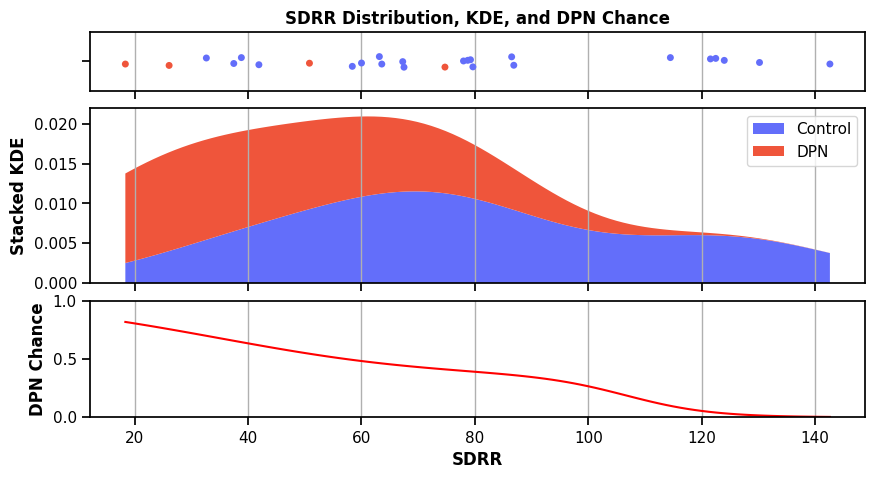

In [55]:
def plot_metric_distribution(metric, kde_df):
   # kde_df = compute_kde_for_metric(median, metric)
    fig, axs = plt.subplots(3, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 3, 2], 'hspace': 0.15})
    
    # Upper subplot
    sns.stripplot(data=median, x=metric, hue='DPN', alpha=1, ax=axs[0])
    axs[0].set_title(f'{metric} Distribution, KDE, and DPN Chance')
    axs[0].grid(True, axis='x')
    axs[0].legend().set_visible(False)

    # Middle subplot
    axs[1].stackplot(kde_df['x_values'], kde_df['control_kde'], kde_df['dpn_kde'], labels=['Control', 'DPN'])
    axs[1].legend()
    axs[1].set_ylabel('Stacked KDE')

    # Lower subplot
    sns.lineplot(data=kde_df, x='x_values', y='dpn_chance', color='red', ax=axs[2])
    axs[2].set_xlabel(metric)
    axs[2].set_ylabel('DPN Chance')
    axs[2].set_ylim(0, 1)

    # Remove x labels for the upper and middle plots
    for ax in axs[:2]:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    for ax in axs:
        ax.grid(True, axis='x')

    #plt.tight_layout()
    plt.show()

kde_df = compute_kde_for_metric(median, 'SDRR')
plot_metric_distribution('SDRR', kde_df)

### Drawing all KDEs

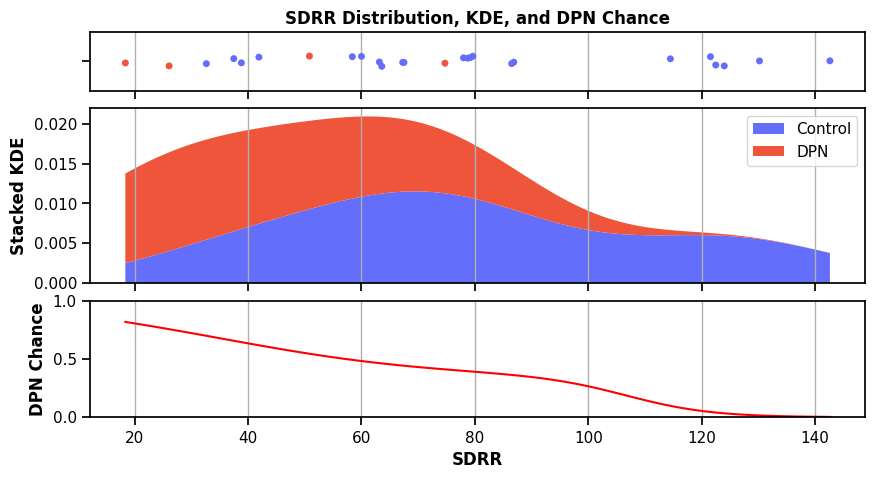

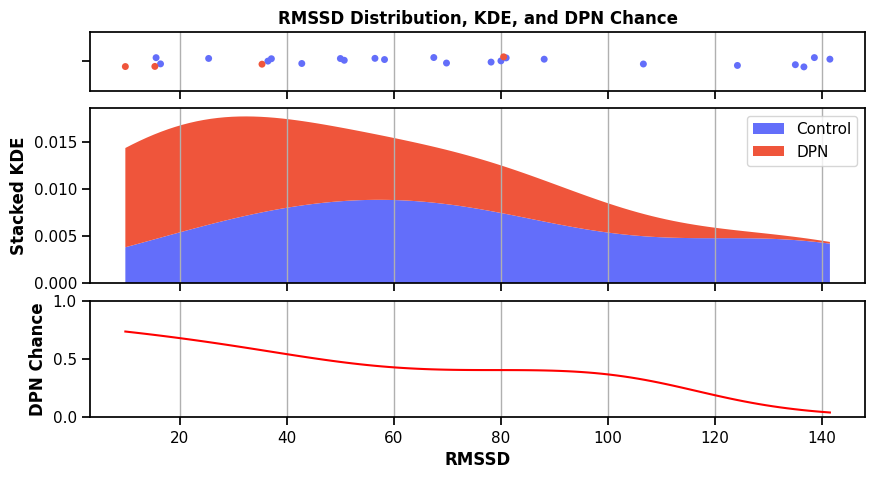

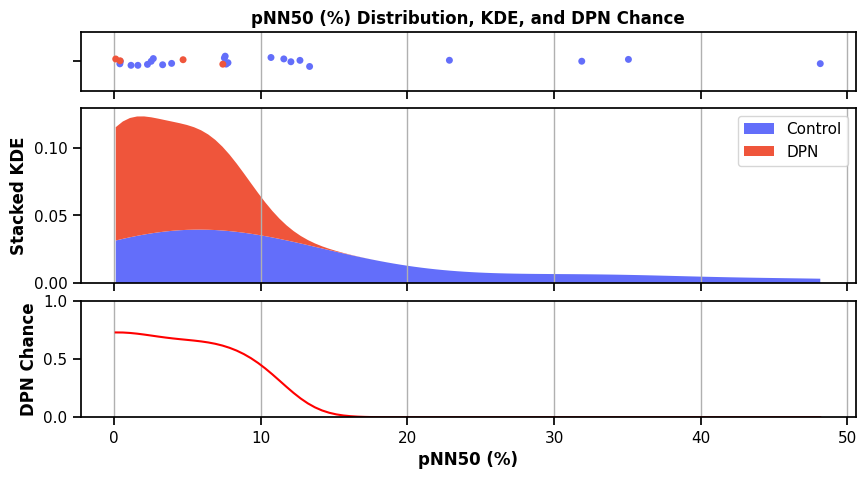

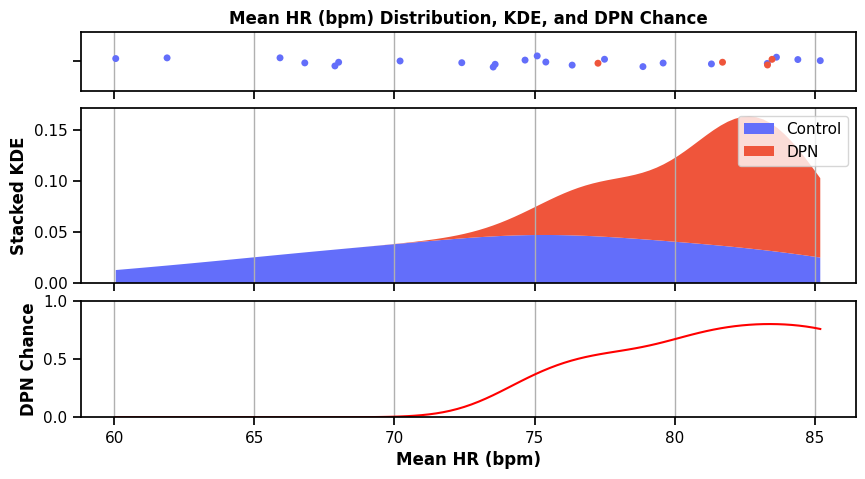

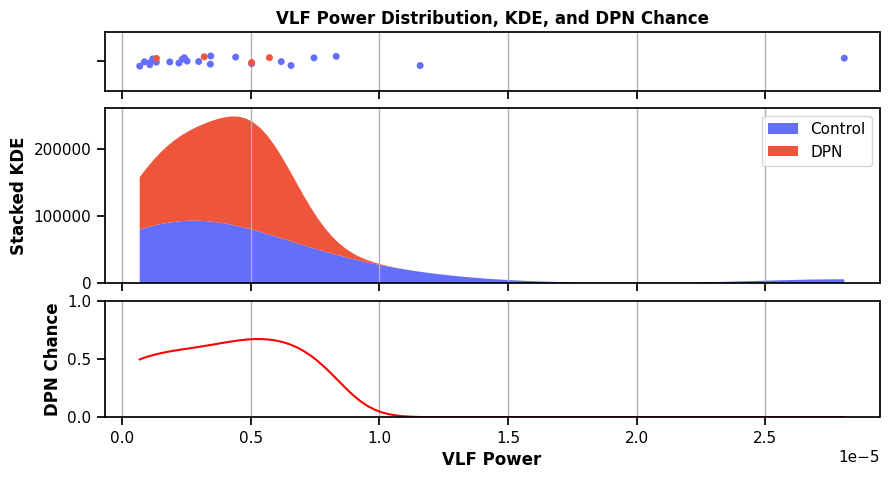

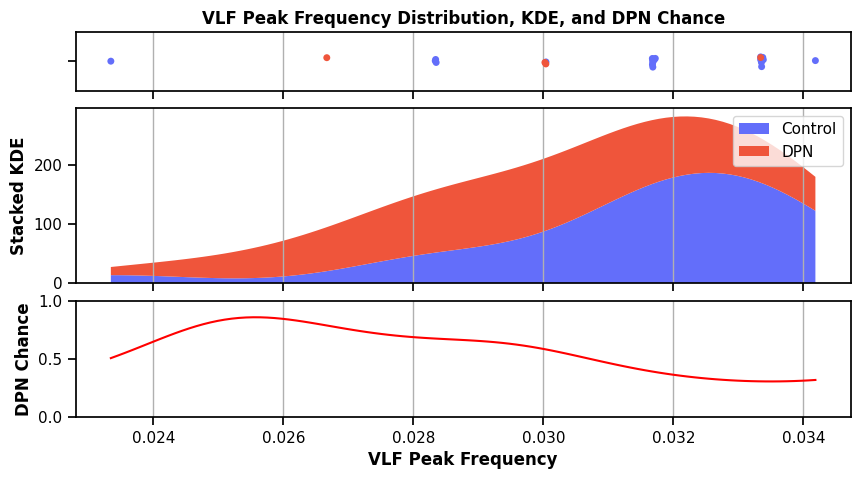

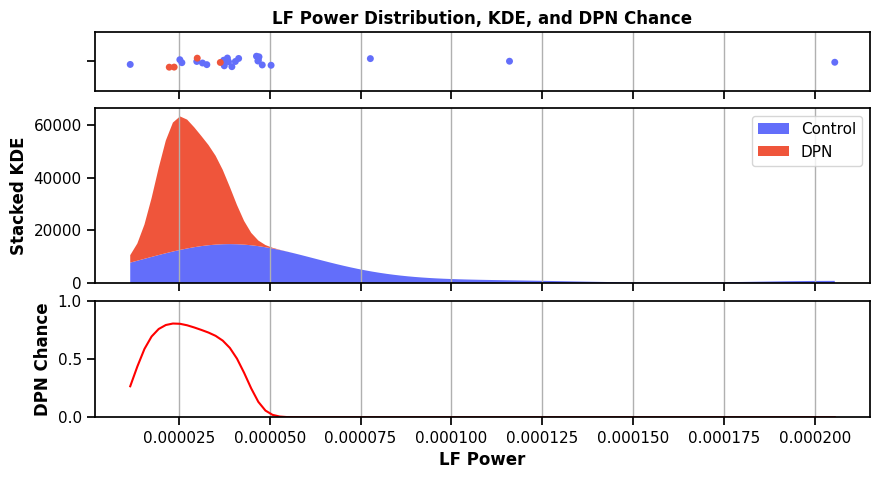

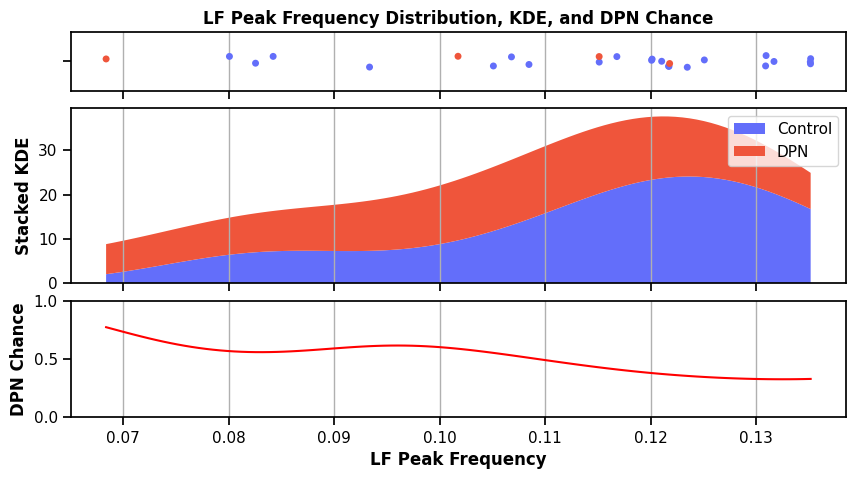

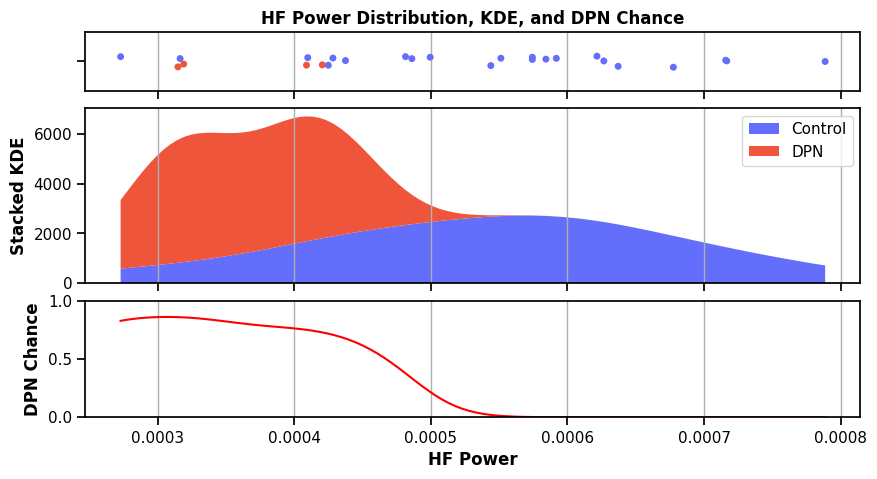

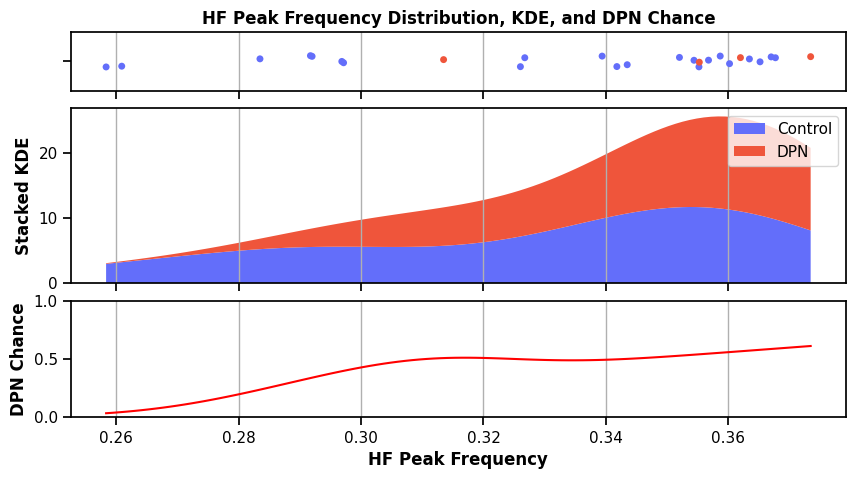

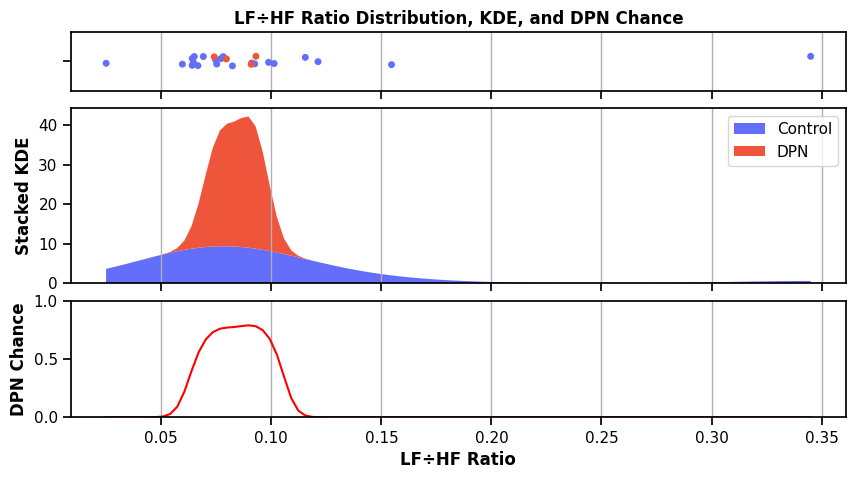

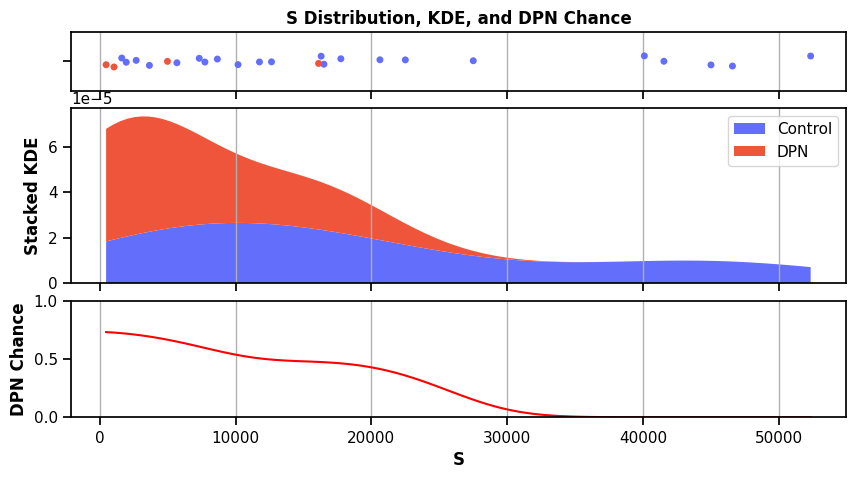

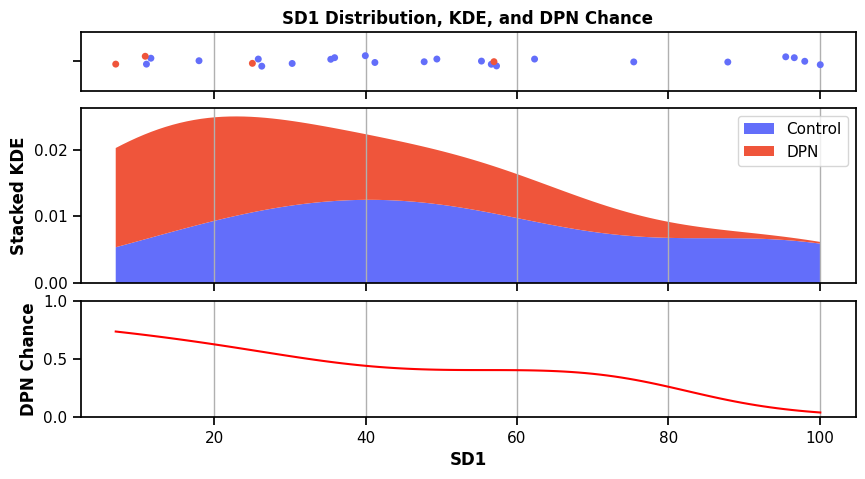

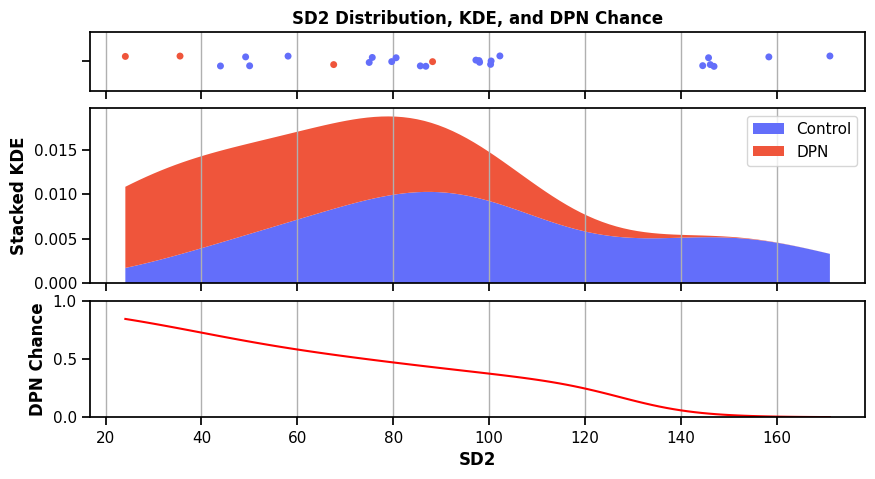

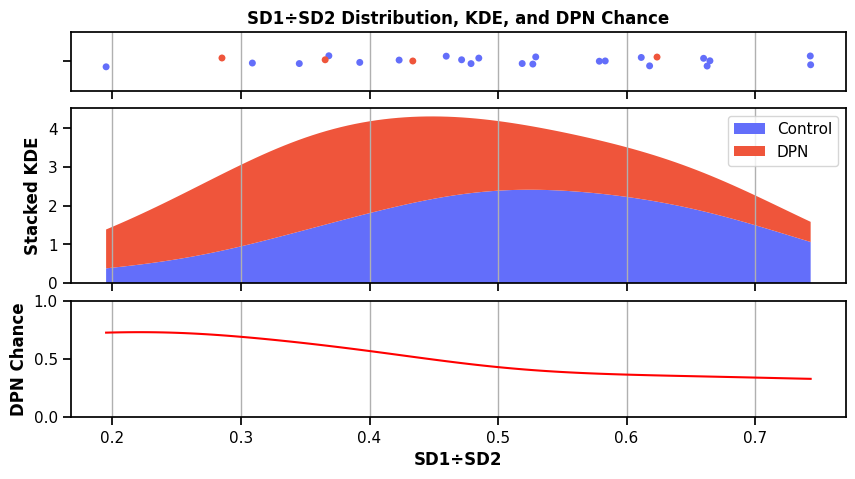

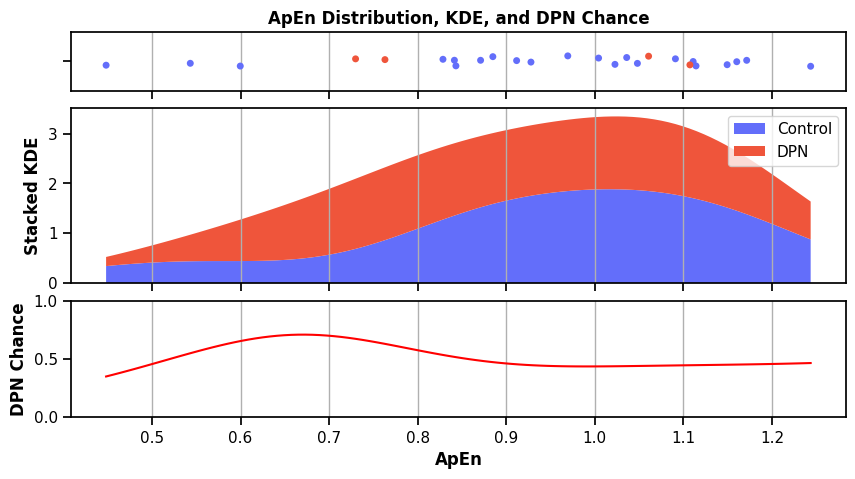

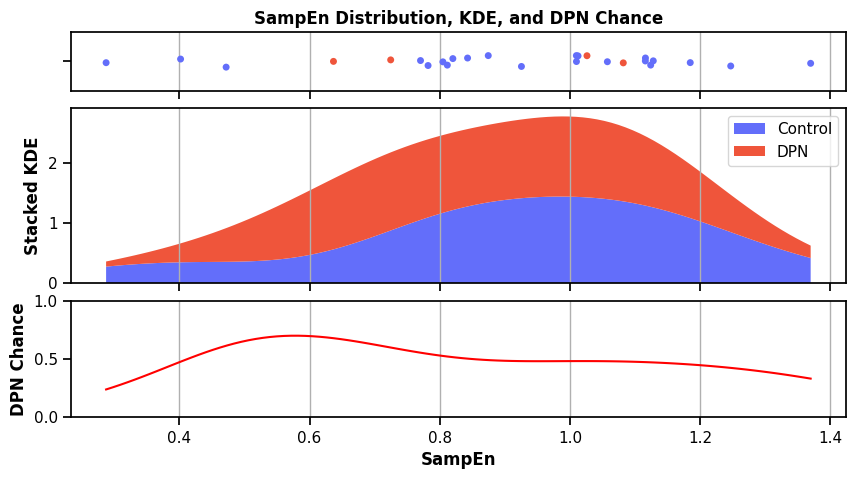

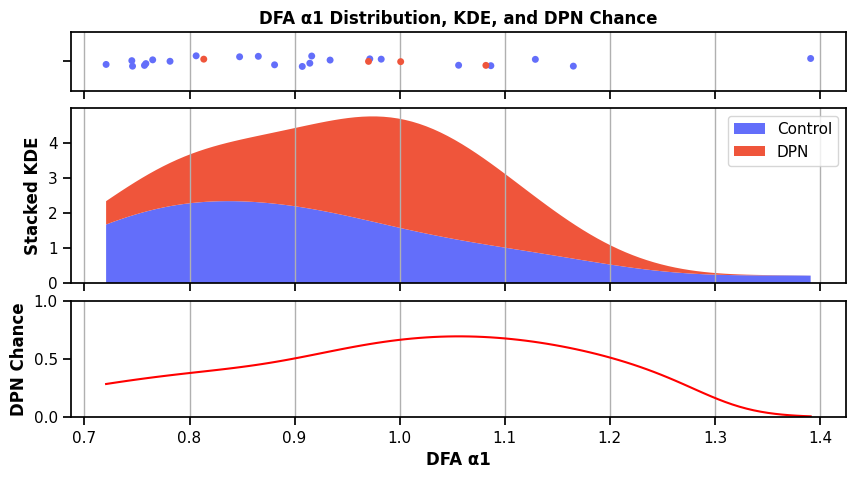

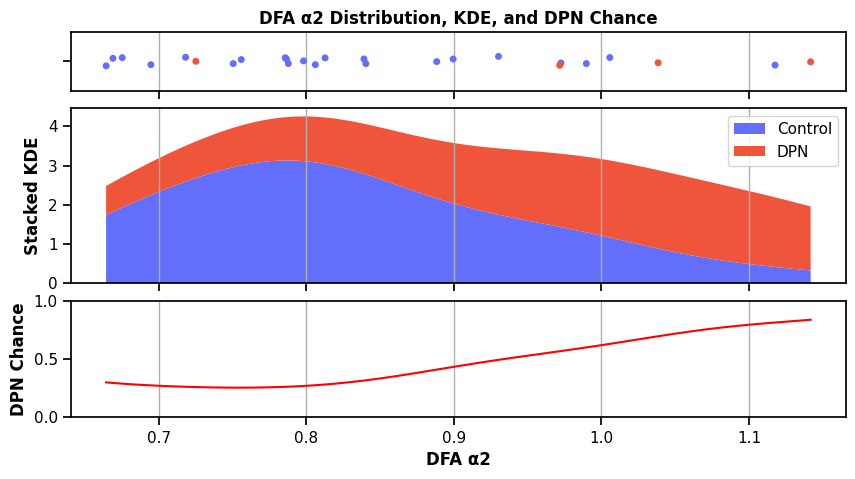

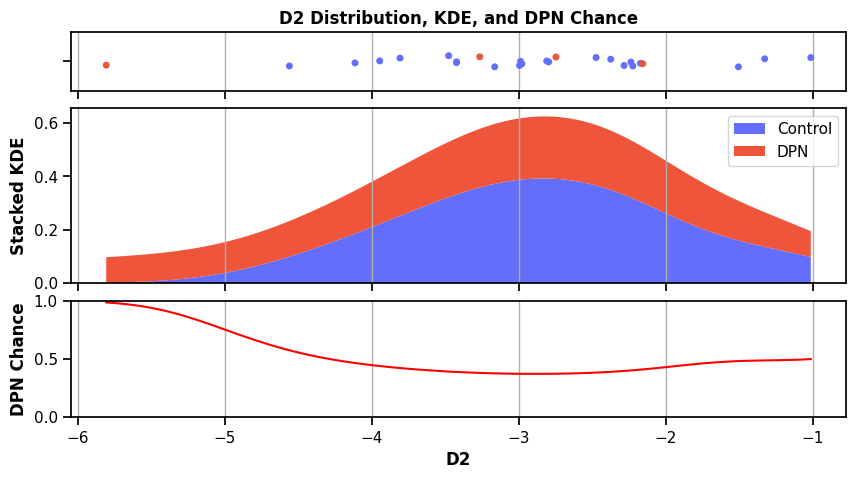

In [56]:
kde_dict = {metric: compute_kde_for_metric(median, metric, False) for metric in indicator_columns}

for metric, kde_df in kde_dict.items():
    
    plot_metric_distribution(metric, kde_df)
    #break;

In [57]:
chances = deciles.produce_median_melt(data, indicator_columns)
# Create and apply a chance, which is a sample of dpn_chance from kde_dict appropriate metric. Use the closest x_value
def get_closest_dpn_chance(row, kde_dict):
    metric = row['metric']
    value = row['value']
    kde_df = kde_dict[metric]
    closest_index = (kde_df['x_values'] - value).abs().idxmin()
    return kde_df.loc[closest_index, 'dpn_chance']

chances['dpn_chance'] = chances.apply(get_closest_dpn_chance, axis=1, kde_dict=kde_dict)
chances

,id,DPN,metric,value,dpn_chance
0,0,False,SDRR,79.23,0.40
1,3,False,SDRR,63.16,0.46
2,4,False,SDRR,78.74,0.40
3,5,False,SDRR,58.39,0.49
4,7,False,SDRR,67.28,0.44
...,...,...,...,...,...
515,35,False,D2,-1.50,0.48
516,37,True,D2,-5.81,0.98
517,38,True,D2,-2.16,0.41
518,39,True,D2,-3.26,0.38


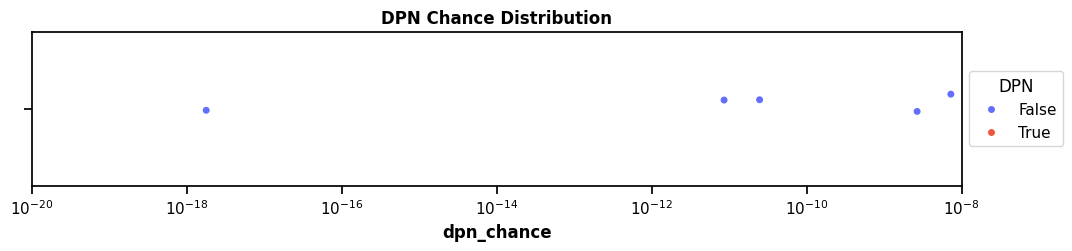

In [58]:
dpn_chance = chances.groupby(['DPN','id'])['dpn_chance'].prod().reset_index()

dpn_chance

plt.figure(figsize=(12, 2))
sns.stripplot(data=dpn_chance, x='dpn_chance', hue='DPN', alpha=1)
plt.xscale('log')

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", title='DPN')
plt.title('DPN Chance Distribution')
plt.xlim([1e-20, 1e-8])
plt.show()

In [59]:

def set_dpn_threshold(cutoff = 1e-6):
    true_positives = ((dpn_chance['dpn_chance'] > cutoff) & (dpn_chance['DPN'] == True)).sum()
    false_positives = ((dpn_chance['dpn_chance'] > cutoff) & (dpn_chance['DPN'] == False)).sum()
    true_negatives = ((dpn_chance['dpn_chance'] <= cutoff) & (dpn_chance['DPN'] == False)).sum()
    false_negatives = ((dpn_chance['dpn_chance'] <= cutoff) & (dpn_chance['DPN'] == True)).sum()
    total_positives = (dpn_chance['DPN'] == True).sum()
    total_negatives = (dpn_chance['DPN'] == False).sum()
    precision = true_positives / (true_positives + false_positives)
    accuracy = (true_positives + true_negatives) / (total_positives + total_negatives)
    recall = true_positives / total_positives
    
    results = {
        'true_positives': true_positives,
        'false_positives': false_positives,
        'true_negatives': true_negatives,
        'false_negatives': false_negatives,
        'total_positives': total_positives,
        'total_negatives': total_negatives,
        'precision': precision,
        'accuracy': accuracy,
        'recall': recall
    }
    return results



results = set_dpn_threshold()

confusion_matrix = pd.DataFrame({
    'Positive': [results['true_positives'], results['false_positives']],
    'Negative': [results['true_negatives'], results['false_negatives']]
}, index=['True', 'False'])

print("Count of identification instances:")
display(confusion_matrix)

print("Precision: ", results['precision'])
print("Accuracy: ", results['accuracy'])
print("Recall: ", results['recall'])


Count of identification instances:


,Positive,Negative
True,3,21
False,1,1


Precision:  0.75
Accuracy:  0.9230769230769231
Recall:  0.75


C:\Users\326po\AppData\Local\Temp\ipykernel_1740\601007318.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_results = pd.concat([threshold_results, pd.DataFrame({


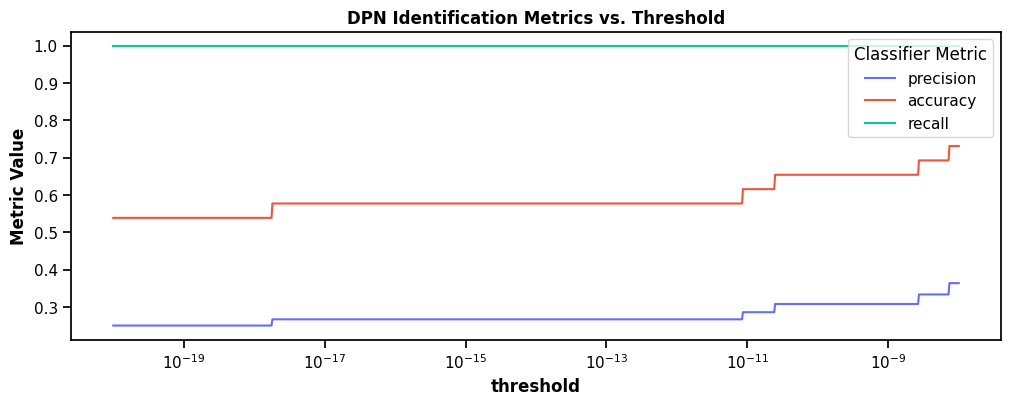

In [60]:
thr_columns = ['threshold', 'precision', 'accuracy', 'recall']
threshold_results = pd.DataFrame(columns=thr_columns)

for threshold in np.logspace(-20, -8, 1000):
    #print(f"Threshold: {threshold}")
    results = set_dpn_threshold(threshold)
    threshold_results = pd.concat([threshold_results, pd.DataFrame({
        'threshold': [threshold],
        'precision': [results['precision']],
        'accuracy': [results['accuracy']],
        'recall': [results['recall']]
    })], ignore_index=True)

plt.figure(figsize=(12, 4))
plt.title('DPN Identification Metrics vs. Threshold')
for metric in thr_columns[1:]:
    sns.lineplot(data=threshold_results, x='threshold', y=metric, label=metric)
plt.legend(title='Classifier Metric')
plt.ylabel('Metric Value')
plt.xscale('log')
plt.show()